In [30]:
import scipy
import numpy as np
from matplotlib import pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''

        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        n = self.size #store the size of our space

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.state[i,j] * (
            self.state[(i + 1) % n, j] +
            self.state[(i - 1) % n, j] +
            self.state[i, (j + 1) % n] +
            self.state[i, (j - 1) % n]))
                   + 2 * self.h * self.state[i,j])

        # Log probability of changing state
        #log_p = -delta_E / (self.temperature * self.kB) Use this for T in Kelvin
        log_p_e = -delta_E / self.temperature
        log_p = min(0, log_p_e)
        
        #Determines if the state should be flipped
        #log(1) = 0
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


Finished 0 trials for T = 1
Finished 10 trials for T = 1
Finished 20 trials for T = 1
Finished 30 trials for T = 1
Finished 40 trials for T = 1
Finished 50 trials for T = 1
Finished 60 trials for T = 1
Finished 70 trials for T = 1
Finished 80 trials for T = 1
Finished 90 trials for T = 1
Finished 0 trials for T = 2
Finished 10 trials for T = 2
Finished 20 trials for T = 2
Finished 30 trials for T = 2
Finished 40 trials for T = 2
Finished 50 trials for T = 2
Finished 60 trials for T = 2
Finished 70 trials for T = 2
Finished 80 trials for T = 2
Finished 90 trials for T = 2
Finished 0 trials for T = 3
Finished 10 trials for T = 3
Finished 20 trials for T = 3
Finished 30 trials for T = 3
Finished 40 trials for T = 3
Finished 50 trials for T = 3
Finished 60 trials for T = 3
Finished 70 trials for T = 3
Finished 80 trials for T = 3
Finished 90 trials for T = 3
Finished 0 trials for T = 4
Finished 10 trials for T = 4
Finished 20 trials for T = 4
Finished 30 trials for T = 4
Finished 40 trials

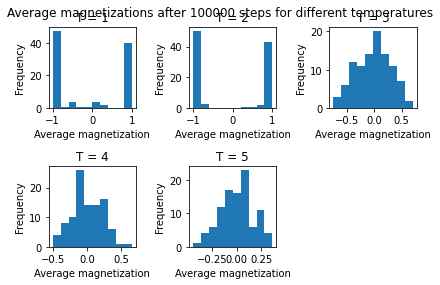

In [39]:
size = 10
temps = [1, 2, 3, 4, 5]
steps = []
mags = []
n_trials = 100

for t in temps:
    mag_t = []
    for i in range(n_trials):
        sim = IsingSimulation(size, temperature=t)
        for _ in range(10000):
            sim.update()
        if i%10 == 0:
            print(f"Finished {i} trials for T = {t}")
        mag_t.append(sim.average_magnetism())
    mags.append(mag_t)

plt.figure()
plt.subplot(2, 3, 1)
plt.hist(mags[0], bins = 10)
plt.xlabel("Average magnetization")
plt.ylabel("Frequency")
plt.title("T = 1")
plt.subplot(2, 3, 2)
plt.hist(mags[1], bins = 10)
plt.xlabel("Average magnetization")
plt.ylabel("Frequency")
plt.title("T = 2")
plt.subplot(2, 3, 3)
plt.hist(mags[2], bins = 10)
plt.xlabel("Average magnetization")
plt.ylabel("Frequency")
plt.title("T = 3")
plt.subplot(2, 3, 4)
plt.hist(mags[3], bins = 10)
plt.xlabel("Average magnetization")
plt.ylabel("Frequency")
plt.title("T = 4")
plt.subplot(2, 3, 5)
plt.hist(mags[4], bins = 10)
plt.xlabel("Average magnetization")
plt.ylabel("Frequency")
plt.title("T = 5")
plt.suptitle("Average magnetizations after 100000 steps for different temperatures")
plt.tight_layout()
plt.show()